In [1]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
def bee_pairs_to_timeseries(df):
    close = df[['frame_idx', 'id_x', 'id_y']]
    close = close.set_index(['frame_idx'])
    close['pair'] = list(zip(close.id_x, close.id_y))
    u_pairs = close.pair.unique()
    dft = DataFrame(0, index=u_pairs, columns=np.arange(1024))
    gr = close.groupby(level='frame_idx')

    for i, group in gr:
        l = group['pair']
        dft.loc[l,i] = 1

#     kette1 = dft.apply(get_ketten, axis=1, args=[1])

    # keep values over 3 and count length or arrays
#     k = kette1.apply(lambda x: len([item for item in x if item>3]))
#     filteredout = k[k > 0]

    return dft

In [3]:
path_list = [
    "../00_Data/testset_2015_1h/2015082215",
    "../00_Data/testset_2015_1h/2015092215",
    "../00_Data/testset_2015_1h/2015102215"
]
path_list = ["../00_Data/testset_2015_1h/2015092215"]

In [4]:
for p in path_list:

    fc = prep.get_fc(p, 0)
    df = prep.get_dataframe(fc)
    df = prep.calcIds(df, 0.9)

    df_c = prep.correct_bees_timeframes(df)
    df_c_close = prep.get_close_bees(df_c, 150)
    df_c_close_pairs = bee_pairs_to_timeseries(df_c_close)
    
    df_close = prep.get_close_bees(df, 150)
    df_close_pairs = bee_pairs_to_timeseries(df_close)


### file ../00_Data/testset_2015_1h/2015092215 cam 0


In [5]:
df_close_pairs.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
"(1205, 1285)",1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(596, 1668)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(1365, 1405)",1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
"(633, 797)",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(857, 1045)",1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def stat_summe(dft):
    summe = dft.sum(axis=1)
    print("Anzahl Paare: {}".format(summe.shape))
    print(summe.describe())
    print("###")
    print(summe.value_counts().sort_index())

## Statistik zu Paaren (ohne Korrektur) - Summen

In [7]:
stat_summe(df_close_pairs)

Anzahl Paare: (724,)
count    724.000000
mean       9.433702
std       15.118518
min        1.000000
25%        2.000000
50%        5.000000
75%       10.250000
max      135.000000
dtype: float64
###
1      165
2       66
3       77
4       53
5       33
6       42
7       36
8       30
9       23
10      18
11      17
12      12
13      19
14      11
15      15
16       8
17       7
18       8
19       4
20      10
21       6
22       1
23       7
24       2
26       3
27       2
28       2
31       3
32       2
33       4
34       1
35       1
36       2
37       2
38       1
41       3
43       1
44       4
46       1
48       2
51       2
56       3
60       1
66       3
68       2
79       1
84       1
98       1
99       1
102      2
103      1
133      1
135      1
dtype: int64


In [28]:
def stat_ketten(liste):
    print("Anzahl der Paare: {}".format(liste.shape))
    slist = [item for row in liste for item in row]
    print(len(slist))
    print(Series(slist).describe())
    print(Series(slist).value_counts().sort_index())
    print(Series(slist).value_counts().sort_index().describe())
    Series(slist).hist(bins=100)
    plt.show()
    Series(slist).plot.box()
    plt.show()

## Statistik zu Paaren (MIT Korrektur) - Summen

In [29]:
stat_summe(df_c_close_pairs)

Anzahl Paare: (796,)
count    796.000000
mean       9.580402
std       15.830146
min        1.000000
25%        1.000000
50%        4.000000
75%       11.000000
max      146.000000
dtype: float64
###
1      217
2       62
3       66
4       59
5       31
6       43
7       37
8       37
9       22
10      22
11      19
12      13
13      20
14      12
15      10
16      11
17      10
18       8
19       5
20       7
21       6
22       5
23       6
24       6
25       4
26       2
28       3
29       1
30       2
32       2
      ... 
35       3
36       3
38       3
40       1
41       3
42       2
44       2
46       2
48       1
49       1
50       1
51       1
52       1
59       2
60       3
61       1
66       1
69       1
71       1
72       1
74       1
76       1
83       1
94       1
105      2
108      1
109      1
110      1
139      1
146      1
dtype: int64


## Länge von 1er-Ketten (ohne Korrektur)

In [30]:
kette1 = df_close_pairs.apply(prep.get_ketten, axis=1, args=[1])

Anzahl der Paare: (724,)
2235
count    2235.000000
mean        3.055928
std         4.003021
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        53.000000
dtype: float64
1     1014
2      417
3      241
4      149
5      113
6       85
7       49
8       36
9       24
10      20
11      16
12      11
13      12
14       5
15       4
16       7
17       5
18       2
19       3
20       4
21       3
22       1
24       2
25       1
27       4
31       1
32       1
40       1
51       2
53       2
dtype: int64
count      30.000000
mean       74.500000
std       198.375602
min         1.000000
25%         2.000000
50%         5.000000
75%        33.000000
max      1014.000000
dtype: float64


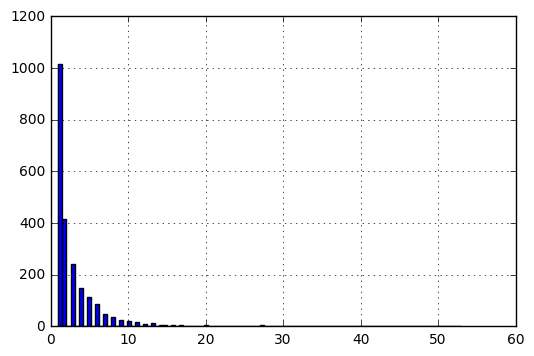

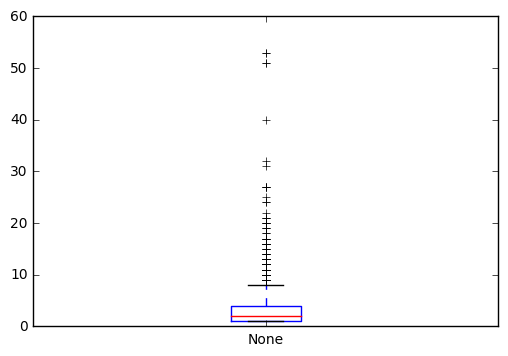

In [31]:
stat_ketten(kette1)

## Länge von 1er-Ketten (MIT Korrektur)

Anzahl der Paare: (796,)
1903
count    1903.000000
mean        4.007357
std         5.306083
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        60.000000
dtype: float64
1     734
2     275
3     233
4     147
5     115
6      88
7      63
8      46
9      33
10     29
11     23
12     17
13     17
14     12
15      6
16      8
17      8
18      5
19      7
20      4
21      5
22      3
24      2
25      3
27      2
28      3
29      3
30      1
32      1
35      3
38      1
47      1
49      1
54      1
59      1
60      2
dtype: int64
count     36.000000
mean      52.861111
std      133.123177
min        1.000000
25%        2.000000
50%        5.500000
75%       30.000000
max      734.000000
dtype: float64


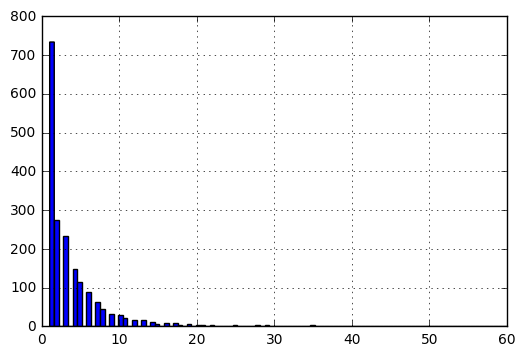

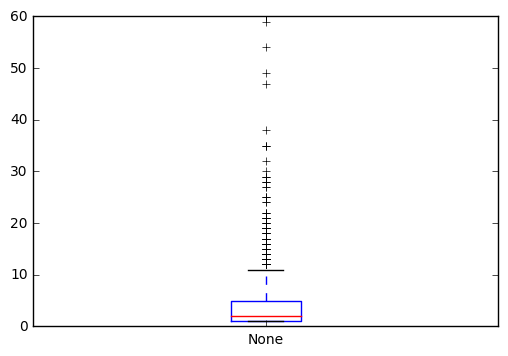

In [32]:
kette_c_1 = df_c_close_pairs.apply(prep.get_ketten, axis=1, args=[1])
stat_ketten(kette_c_1)

## Länge von 0er Ketten (ohne Korrektur)

Anzahl der Paare: (724,)
2943
count    2943.000000
mean      249.590894
std       321.274112
min         1.000000
25%         2.000000
50%        47.000000
75%       466.000000
max      1023.000000
dtype: float64
1       582
2       227
3       150
4        90
5        51
6        36
7        34
8        18
9        21
10       17
11       15
12       15
13       14
14        6
15       16
16        7
17        4
18        8
19        5
20        7
21        4
22       11
23        7
24        6
25        7
26        5
27        3
28        7
29        5
30        7
       ... 
984       4
985       1
987       1
988       2
989       1
990       1
991       5
992       6
993       3
995       2
996       1
997       1
998       1
999       3
1002      3
1003      2
1004      1
1005      2
1006      1
1009      1
1010      3
1013      4
1015      3
1016      1
1017      1
1019      1
1020      1
1021      4
1022      3
1023      2
dtype: int64
count    785.000000
mean       3.749045
st

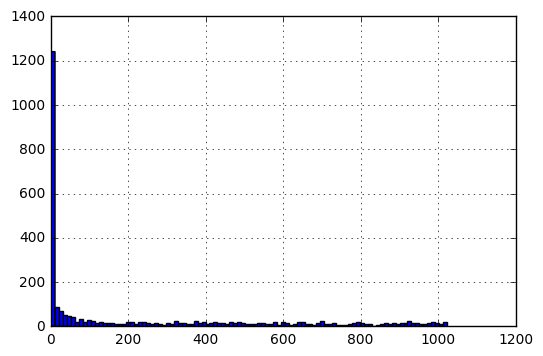

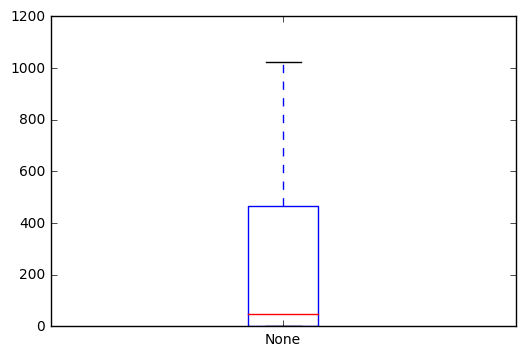

In [33]:
kette_0 = df_close_pairs.apply(prep.get_ketten, axis=1, args=[0])
stat_ketten(kette_0)

## Länge von 0er Ketten (MIT Korrektur)

Anzahl der Paare: (796,)
2683
count    2683.000000
mean      300.960865
std       330.400932
min         1.000000
25%         5.000000
50%       152.000000
75%       564.000000
max      1023.000000
dtype: float64
1       188
2       220
3       150
4        90
5        47
6        34
7        30
8        18
9        23
10       16
11       20
12       13
13       13
14        7
15       16
16        7
17        9
18        8
19        5
20        6
21        6
22        8
23        7
24        6
25        8
26        6
27        4
28        6
29        4
30        9
       ... 
985       1
987       1
988       2
989       1
990       1
991       5
992       6
993       3
995       2
996       1
997       1
998       2
999       3
1002      3
1003      3
1004      1
1005      2
1006      1
1007      1
1009      2
1010      3
1013      5
1015      3
1016      1
1017      1
1019      1
1020      1
1021      5
1022      3
1023      2
dtype: int64
count    799.000000
mean       3.357947
st

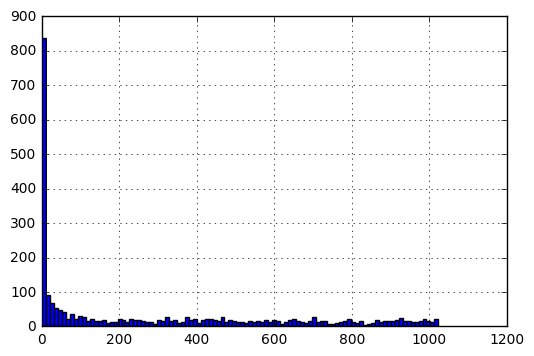

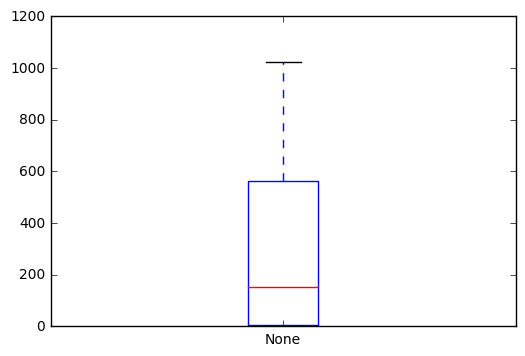

In [34]:
kette_c_0 = df_c_close_pairs.apply(prep.get_ketten, axis=1, args=[0])
stat_ketten(kette_c_0)

In [35]:
a = Series([1,2,3])
b = Series([7,8,9])

In [38]:
c = a.append(b)

In [37]:
a

0    1
1    2
2    3
dtype: int64

In [39]:
c

0    1
1    2
2    3
0    7
1    8
2    9
dtype: int64

In [40]:
str(0.9).replace('.','')

'09'